<a href="https://colab.research.google.com/github/brendanbautista/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [6]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import ast
import numpy as np
import json
import matplotlib.pyplot as plt


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/x_superbowl.csv')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [3]:
df['retweeted_status'] = df['retweeted_status'].isna()
df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce').fillna(0).astype(int)

# Drop columns with a high percentage of missing values or irrelevant data
threshold = 0.8
df = df[df.columns[df.isnull().mean() < threshold]]

from scipy import stats

# Identify columns with numerical data
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Detect and filter out outliers using Z-score
z_scores = np.abs(stats.zscore(df[numerical_columns]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Adjust the threshold (e.g., 3) as needed

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

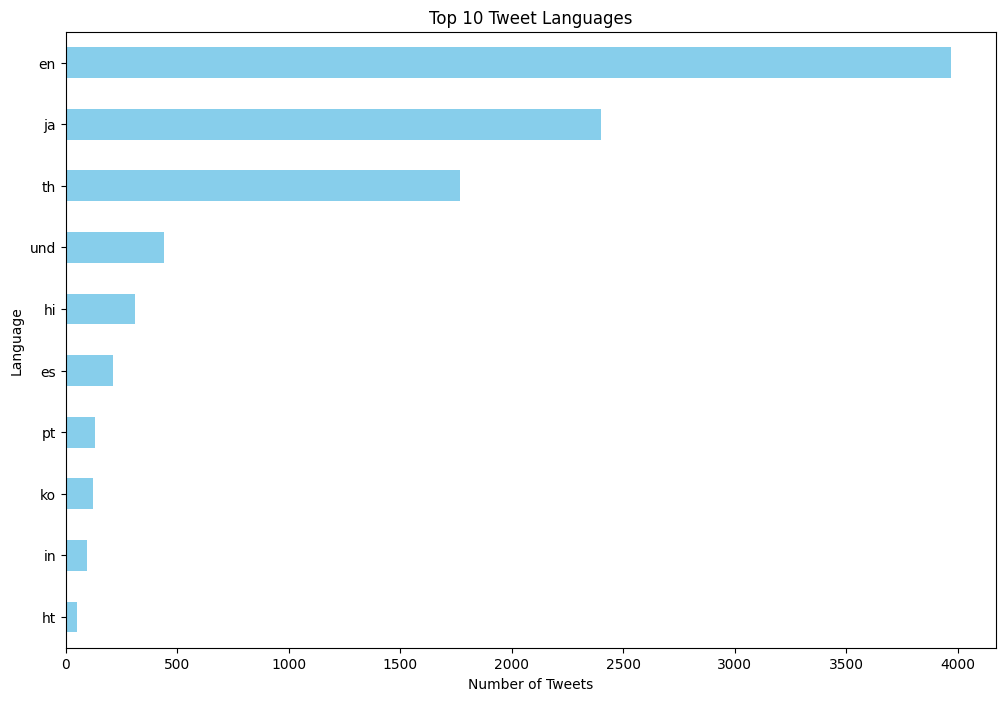

In [7]:
#chart 1
lang_distribution = df['lang'].value_counts().head(10)

# Plotting a horizontal bar chart for the top 10 languages
plt.figure(figsize=(12, 8))
lang_distribution.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Tweet Languages')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')
plt.show()

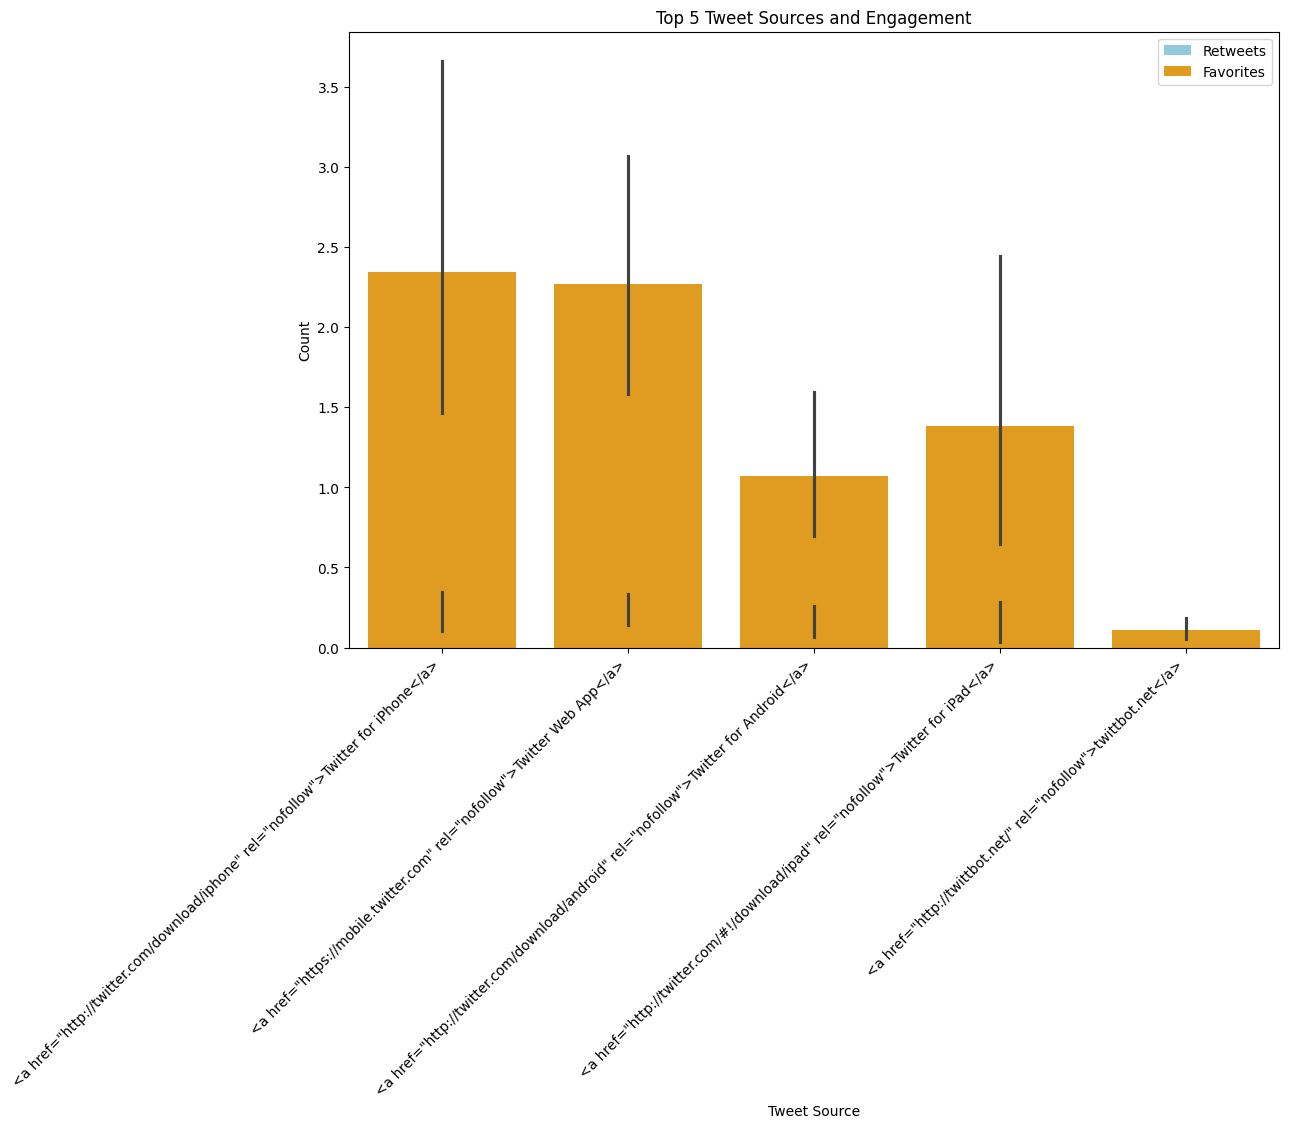

In [9]:
#chart 2
import seaborn as sns

top_sources = df['source'].value_counts().head(5).index

# Filter DataFrame for the top 5 sources
df_top_sources = df[df['source'].isin(top_sources)]

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='source', y='retweet_count', data=df_top_sources, color='skyblue', label='Retweets')
sns.barplot(x='source', y='favorite_count', data=df_top_sources, color='orange', label='Favorites')

plt.title('Top 5 Tweet Sources and Engagement')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()